# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime

df_views_count = pd.read_csv('wiki_ec_page_views.csv', delimiter=",", header=0, index_col=False)

df_edits_count = pd.read_csv('wiki_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_edits_count["Month"] = pd.to_datetime(df_edits_count["Month"])


### 1. Data  preprocessing

In [8]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count = df_views_count.set_index("DateTime")
df_edits_count = df_edits_count.set_index("Month")

df_edits_count.index

Month             0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


DatetimeIndex(['2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2004-01-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Month', length=228, freq=None)

### 1. Edits count

In [79]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
Month,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [80]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='Month', length=228)


In [81]:
size_year = df_edits_count["Size"].groupby(edits_year).sum()
size_year

Month
2002       492
2004      5566
2005      5782
2006      6699
2007      6896
2008     16678
2009     14475
2010     21183
2011     54061
2012     55732
2013     57889
2014     62237
2015     71509
2016     75652
2017     76022
2018     76624
2019     77759
2020     77549
2021    137795
2022    166875
Name: Size, dtype: int64

In [178]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
# edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year

,Edits,Minor edits,Editors
Month,,,
2002,8,2,6
2004,32,16,11
2005,16,3,9
2006,17,6,5
2007,16,7,4
2008,42,27,2
2009,38,17,9
2010,30,12,7
2011,203,28,33


In [187]:
def visualize_date(data, fig_size, kind, width, color, xlabel, ylabel, title, img_format, save_path):
    """
    :param data: df to be used during plotting.
    :param kind: str. The kind of plot to do (e.g., "bar")
    :param width: float. Width of the bars
    :param color: str. color to use (is none specific, put None)
    :param xlabel: str. xlabel name
    :param ylabel: str. ylabel name
    :param title: str. plot's title
    :param img_format: format to save the image (e.g eps, png, svg)
    :param save_path: Path to the Images folder and name for the image.
    :return: The visualization of the data given
    """
    plt.figure(figsize=fig_size)

    if kind == "line":
        ax = data.plot(kind=kind, color=color)
    else:
        ax = data.plot(kind=kind, width=width, color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xticks(rotation=65)
    plt.tight_layout()

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    plt.savefig(save_path, format=img_format, dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1800x1080 with 0 Axes>

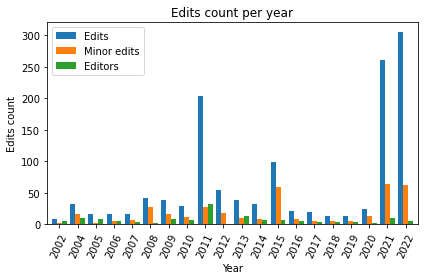

In [189]:
# Plot edits per year
visualize_date(edit_sum_year, (25,15), "bar", 0.82, None, "Year", "Edits count", "Edits count per year", "eps", "Images/edits_count.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1800x1080 with 0 Axes>

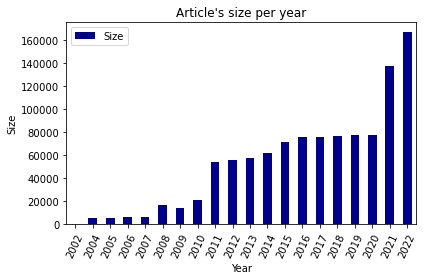

In [190]:
# grouped size as df
size_year = pd.DataFrame(size_year)

# Plot article's size
visualize_date(size_year,(25,15), "bar", 0.5, "darkblue", "Year", "Size", "Article's size per year", "eps", "Images/article_size.eps")

### 2. Views count

In [68]:
df_views_count

,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008-01-01,12,426,612
2008-01-02,4,600,1147
2008-01-03,4,641,1256
2008-01-04,14,627,1197
2008-01-05,7,521,864
...,...,...,...
2022-03-13,156,224,395
2022-03-14,196,318,561
2022-03-15,186,293,574


In [204]:
# select the month
df_month = df_views_count.index.month
df_year = df_views_count.index.year
# Moving averages per year (52 weeks window)
views_mean = df_views_count['Embodied cognition[en]'].groupby(df_year).mean()
views_mean = pd.DataFrame(views_mean)

views_mean

,Embodied cognition[en]
DateTime,
2008,28.273224
2009,88.493151
2010,160.838356
2011,192.575342
2012,259.724044
2013,294.917808
2014,299.682192
2015,265.745205
2016,236.120219


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 576x360 with 0 Axes>

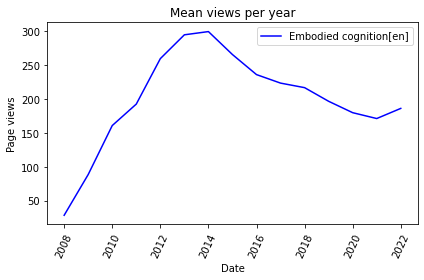

In [209]:

visualize_date(views_mean, (8,5), "line", None, "blue", "Date", "Page views", "Mean views per year", "eps", "Images/views_year.eps")
# ax = df_mean.plot()
# ax.set_xlabel("Date")
# ax.set_ylabel("Page views")
# ax.set_title("Yearly rolling mean")
#
# plt.show()

In [374]:
views_before_project = df_views_count['2020-03-01':'2021-02-28']
views_during_project = df_views_count['2021-03-01':'2022-02-28']


views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()
#
# # views_during_project
# views_before_project_month = views_before_project.index.month
# views_during_project_month = views_during_project.index.month
#
views_average_1
# # views_during_project.tail(50)
#

DateTime
1     216.911290
2     243.355030
3     228.083333
4     234.469444
5     213.661290
6     172.911111
7     146.502688
8     150.236559
9     195.669444
10    241.295699
11    245.041667
12    209.336022
Name: Embodied cognition[en], dtype: float64

In [377]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

,Before,After
count,12.000000,12.000000
mean,0.856535,0.834481
std,0.070292,0.041711
min,0.761748,0.758592
25%,0.807020,0.806702
50%,0.858352,0.837091
75%,0.898023,0.855575
max,1.011361,0.913186


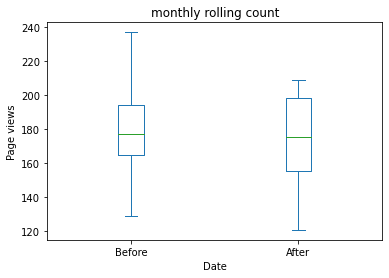

In [365]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

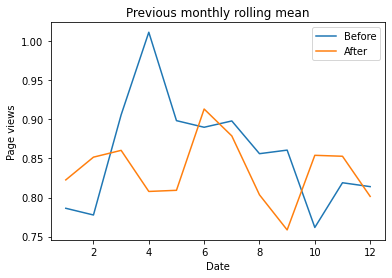

In [378]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()